In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
# import seaborn; seaborn.set()  # plot styling
import numpy as np

###  Part two: Learning Seattle's Work Habits from Bicycle Counts


The data we will use here are the hourly bicycle counts on Seattle's Fremont Bridge. These data come from an automated bicycle counter, installed in late 2012, which has inductive sensors under the sidewalks on either side of the bridge. The daily or hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the hourly dataset. To download the data directly, you can uncomment the following curl command:

In [103]:
import pandas as pd
data = pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/Prac_session/Bridge.csv", index_col='Date', parse_dates=True)
data=data.iloc[:-12000,:]
data.tail()

#We'll do some quick data cleaning: 
#we'll rename the columns to the shorter "West" and "East", 
#set any missing values to zero, and add a "Total" column:
data.columns = ['West', 'East']
data.fillna(0, inplace=True)
data['Total'] = data.eval('East + West')

In [104]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


/home/lingjing/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


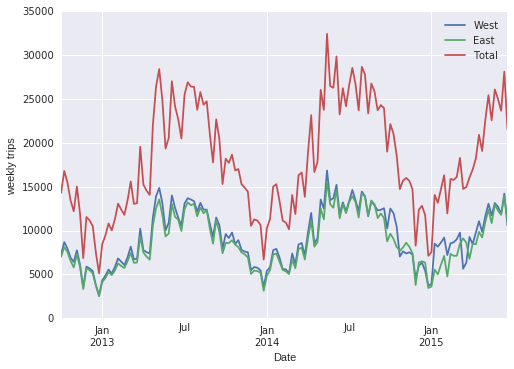

In [90]:
data.resample('W', how='sum').plot()
plt.ylabel('weekly trips');

In [91]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour,
                           fill_value=0)
pivoted.head()

East                                      ... West                 \
             0  1  2    3  4   5   6    7    8    9  ...   14   15   16   17   
2012-10-03    9  6  1  3.0  1  10  50   95  146  104 ...   77   72  133  192   
2012-10-04   11  0  6  3.0  1  11  51   89  134   94 ...   63   73  114  154   
2012-10-05    7  4  3  2.0  2   7  37  101  119   81 ...   63   80  120  144   
2012-10-06    7  5  2  2.0  1   2  15   16   47   55 ...   89  115  107  107   
2012-10-07    5  5  1  2.0  2   3   8   12   26   36 ...  126  122  132  118   

                                     
             18  19  20  21  22  23  
2012-10-03  122  59  29  25  24   5  
2012-10-04  137  57  27  31  25  11  
2012-10-05  107  42  27  11  10  16  
2012-10-06   41  40  25  18  14  15  
2012-10-07   68  26  19  12   9   5  

[5 rows x 48 columns]

In [92]:
X = pivoted.values
X.shape

(990, 48)

In [93]:
X

array([[  9.,   6.,   1., ...,  25.,  24.,   5.],
       [ 11.,   0.,   6., ...,  31.,  25.,  11.],
       [  7.,   4.,   3., ...,  11.,  10.,  16.],
       ..., 
       [  6.,   5.,   2., ...,  44.,  35.,  21.],
       [ 12.,   2.,   4., ...,  40.,  17.,   9.],
       [ 18.,   2.,   1., ...,  38.,  32.,  28.]])

### Q1. 

Visulize the data using PCA (two dimension). Color the points by the sum of all features.

In [1]:
from sklearn.decomposition import PCA

### Question 2. 

Using KMeans to cluster the PCA transformed data set into two clusters. And plot your result.

In [2]:
from sklearn.cluster import KMeans

### Question 3,
Use Guassian Mixture to repeat question 2.

In [3]:
from sklearn.mixture import GaussianMixture

### Question 4: 

let's analyze the result and see why our clustering result makes sense. What is the average hourly trend by cluster and time using groupby. 

['Cluster', data.index.time]

In [98]:
# use this data set:
#save your clustering result to cluster_label

#cluster_label=.... Make sure use Gaussian or you won't see the result.

pivoted['Cluster'] = cluster_label # Make sure here is your clustering result.
data1 = data.join(pivoted['Cluster'], on=data.index.date)
data1.head()

,West,East,Total,Cluster
Date,,,,
2012-10-03 00:00:00,4.0,9.0,13.0,0
2012-10-03 01:00:00,4.0,6.0,10.0,0
2012-10-03 02:00:00,1.0,1.0,2.0,0
2012-10-03 03:00:00,2.0,3.0,5.0,0
2012-10-03 04:00:00,6.0,1.0,7.0,0


### Question 5:  

Finally, we can plot the average hourly trend among the days within each cluster:

### What we could guess from these two plots?

### Part Two: The difficult question from Clustering HW. (I will explain this one. It should be quick)

This homework assignment concerns NYPD police stops in New York City in the years 
2011-2012 where the suspected crime was CPW (criminal possession of a weapon).  You can 
read more about these stops at 

https://en.wikipedia.org/wiki/Terry_stop 

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City 

You are given 1,069 stop records in the file ‘original_with_duplicates_noid.csv’, but 
unfortunately technical errors have resulted in some exact duplicate records.  You know 
there are around 1,000 unique stops in the file (there may be slightly more or slightly 
fewer).   

In [7]:
data2=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_duplicates_noid.csv")
data2.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,black,27,medium,male,5.666667,180,...,False,False,False,False,False,False,False,Saturday,January,6
1,2011,False,False,False,asian,40,medium,male,6.166667,225,...,False,False,True,True,False,False,False,Friday,November,6
2,2012,False,False,False,black,20,medium,male,6.000000,200,...,False,False,False,False,False,False,False,Saturday,August,6



#### 1. Use a clustering technique of your choice to determine how many unique records there are. (15 pts)

#### 2. Check your work by looking for row-wise duplicates using any technique of your choice (this should be straightforward).  How well did your clustering technique perform?  (5 pts)

#### 3. Write a paragraph explaining what you did in parts a) and b)  (10 pts)

In [9]:
# Factorize the data set.
# Transform the data set to factors for string terms:
data_temp=[]
for i in range(len(data2.T)): #Change for every columns one by one
    temp=data2.iloc[:,i]
    try:                      #change it to float if possible
        temp1=temp.apply(float)
        data_temp.append(list(temp1))
    except ValueError:
        temp1=pd.factorize(temp) #factorize it for strings if not possible
        data_temp.append(list(temp1[0]))
#Then, make it to Pandas Dataframe:
data_q1=pd.DataFrame(data_temp).T
data_q1.columns=data2.columns
data_q1.head()

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,5.666667,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,2011.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,6.166667,225.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0
2,2012.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,6.000000,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0
3,2011.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,5.916667,180.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
4,2011.0,0.0,0.0,0.0,0.0,33.0,1.0,0.0,5.666667,175.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0


In [11]:
#a) For finding duplicates, we calculate the score of accuracy. We stop when we get 0 distance. The only possible situation
#is that the number of unique observations is equal to the number of clusters..
import sklearn.cluster as cluster
for i in range(990,1100):
    est=cluster.KMeans(n_clusters=i)# claster=5
    est.fit(data_q1)
    print est.score(data_q1)
    if est.score(data_q1)==0:
        print("we get {} unique elements".format(i))
        break

-37.677083334
-31.1458333335
-25.1145833335
-19.100694444
-13.600694444
-8.56944444403
-4.01388888806
-0.0
we get 997 unique elements


In [13]:
#b) Check the unique observations.(pandas has a good function drop_duplicates to help us):
ans=len(data_q1.drop_duplicates(list(data_q1.columns)))
print("we get {} unique elements.").format(ans)

we get 997 unique elements.


You are given 1,100 stop records in the file ‘original_with_errors_noid.csv’, but 
unfortunately technical errors have resulted in some almost duplicate records (that is, 
there are some records that are duplicates of others except for slight variations in two 
features).  You know there are around 1,000 unique stops in the file (there may be 
slightly more or slightly fewer). 



In [15]:
data4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_errors_noid.csv")
data4.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2011,False,False,False,black,20,heavy,male,5.500000,200,...,False,False,True,False,False,False,False,Wednesday,November,4
1,2012,False,False,False,black,24,medium,male,5.666667,155,...,False,False,True,False,False,False,False,Monday,August,6
2,2011,False,False,False,black,47,heavy,male,6.000000,245,...,False,True,True,True,False,False,False,Saturday,January,4


#### 1. Which are the two features where errors were introduced? (15 pts) 

#### 2. How many unique records there are? (10 pts)

#### 3. Write a paragraph explaining what you did. (5 pts)

In [16]:
#Facotrize data:
# Transform the data set to factors for string terms:
data_temp=[]
for i in range(len(data4.T)): #Change for every columns one by one
    temp=data4.iloc[:,i]
    try:                      #change it to float if possible
        temp1=temp.apply(float)
        data_temp.append(list(temp1))
    except ValueError:
        temp1=pd.factorize(temp) #factorize it for strings if not possible
        data_temp.append(list(temp1[0]))
#Then, make it to Pandas Dataframe:
data_q2=pd.DataFrame(data_temp).T
data_q2.columns=data2.columns
data_q2.shape

(1100, 39)

In [18]:
#Let's scale the data. Why we need to scale the data for sure??? Or you could not find it by the following way.
from sklearn.preprocessing import scale
data_q2_s=pd.DataFrame(scale(data_q2))
data_q2_s.columns=data_q2.columns

In [20]:
#I try to omit one column every time, and report the KMeans scores. I assume that if I remove error column, the
#score should be much lower. The reason is that duplicated observations exist.:
for i in range(len(data_q2_s.T)):
    temp=list(data_q2_s)
    temp.remove(temp[i])
    GM=cluster.KMeans(n_clusters=1000)
    GM.fit(data_q2_s.loc[:,temp])
    print GM.score(data_q2_s.loc[:,temp])

-7.98323389262
-8.17519206051
-8.10375445662
-8.10375445662
-8.10375445662
-4.1005292115
-8.10375445662
-8.18828544579
-8.21057268839
-3.48139256269
-8.10375445662
-8.18828544579
-8.10375445662
-8.18828544579
-8.10375445662
-8.10375445662
-8.10375445662
-8.10375445662
-8.17519206051
-8.10375445662
-8.10375445662
-8.10375445662
-8.10375445662
-8.17519206051
-8.18828544579
-8.10375445662
-8.17519206051
-8.10375445662
-8.10375445662
-8.10375445662
-8.22366607368
-8.10375445662
-8.18828544579
-8.17519206051
-8.17519206051
-8.10375445662
-8.18807943817
-8.10375445662
-8.10375445662


In [ ]:
print("From the result above, we know that the error columns are:{} and {}".format(list(data_q2.columns)[5],list(data_q2.columns)[9]))